In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import os
import sys
from pymongo import MongoClient

sys.path.append('..')

MONGODB_URI = os.environ.get('MONGODB_URI')
database = ''.join(MONGODB_URI.rsplit('/')[-1:])
conn = MongoClient(host=MONGODB_URI)
mongodb = conn[database]


In [24]:
from carrega_modelo_final_rc import ModelContaminado

model = ModelContaminado()

In [56]:
from atualiza_mongo_rc import monta_filtro

cursor = monta_filtro(mongodb, 10)

INFO:root:Consulta ao banco efetuada.


603cee9bbeb63828c35eb7a6 {'reefer_bbox': [65.21646881103516, 8.310043334960938, 152.1454315185547, 614.7932739257812], 'reefer_class': 0, 'reefer_score': 0.9907009601593018}
False


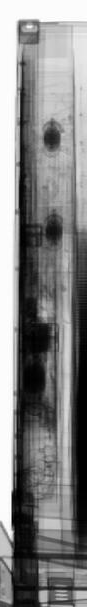

In [57]:
from atualiza_mongo_rc import recupera_imagem

registro = next(cursor)
_id = registro['_id']
predictions_reefer = registro['metadata']['predictions'][0]['reefer'][0]
print(_id, predictions_reefer)
pil_image = recupera_imagem(mongodb, test_set[0][0], predictions_reefer['reefer_bbox'])
print(model.predict(pil_image))
pil_image

603cee9bbeb63828c35eb752 {'reefer_bbox': [63.90375518798828, 3.433001756668091, 148.85813903808594, 582.1262817382812], 'reefer_class': 0, 'reefer_score': 0.9836894869804382}
False


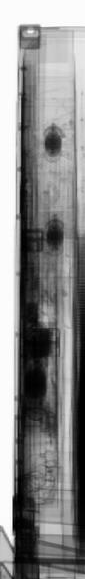

In [59]:
def print_one():
    registro = next(cursor)
    _id = registro['_id']
    predictions_reefer = registro['metadata']['predictions'][0]['reefer'][0]
    print(_id, predictions_reefer)
    pil_image = recupera_imagem(mongodb, test_set[0][0], predictions_reefer['reefer_bbox'])
    print(model.predict(pil_image))
    return pil_image
print_one()

603cee9bbeb63828c35eb78e {'reefer_bbox': [92.74462890625, 6.221773147583008, 188.85560607910156, 600.2770385742188], 'reefer_class': 0, 'reefer_score': 0.988511323928833}
False


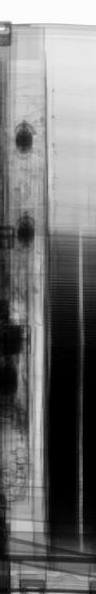

In [60]:
print_one()

603cee50a87e3c1e83edbf1b {'reefer_bbox': [1428.4532470703125, 38.18791198730469, 1507.6109619140625, 652.2520141601562], 'reefer_class': 0, 'reefer_score': 0.971807599067688}
False


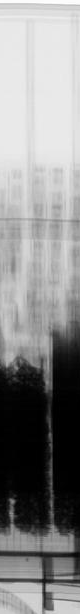

In [61]:
print_one()

603cee51a87e3c1e83edbf53 {'reefer_bbox': [35.09763717651367, 17.95315170288086, 121.0204086303711, 592.2692260742188], 'reefer_class': 0, 'reefer_score': 0.9665173292160034}
False


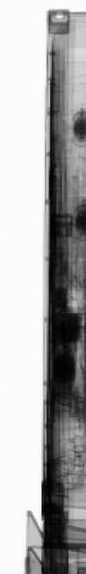

In [62]:
print_one()

603cee61ae377cb75b1aaa46 {'reefer_bbox': [0, 0, 799, 4522], 'reefer_class': 2, 'reefer_score': 0.0}
False


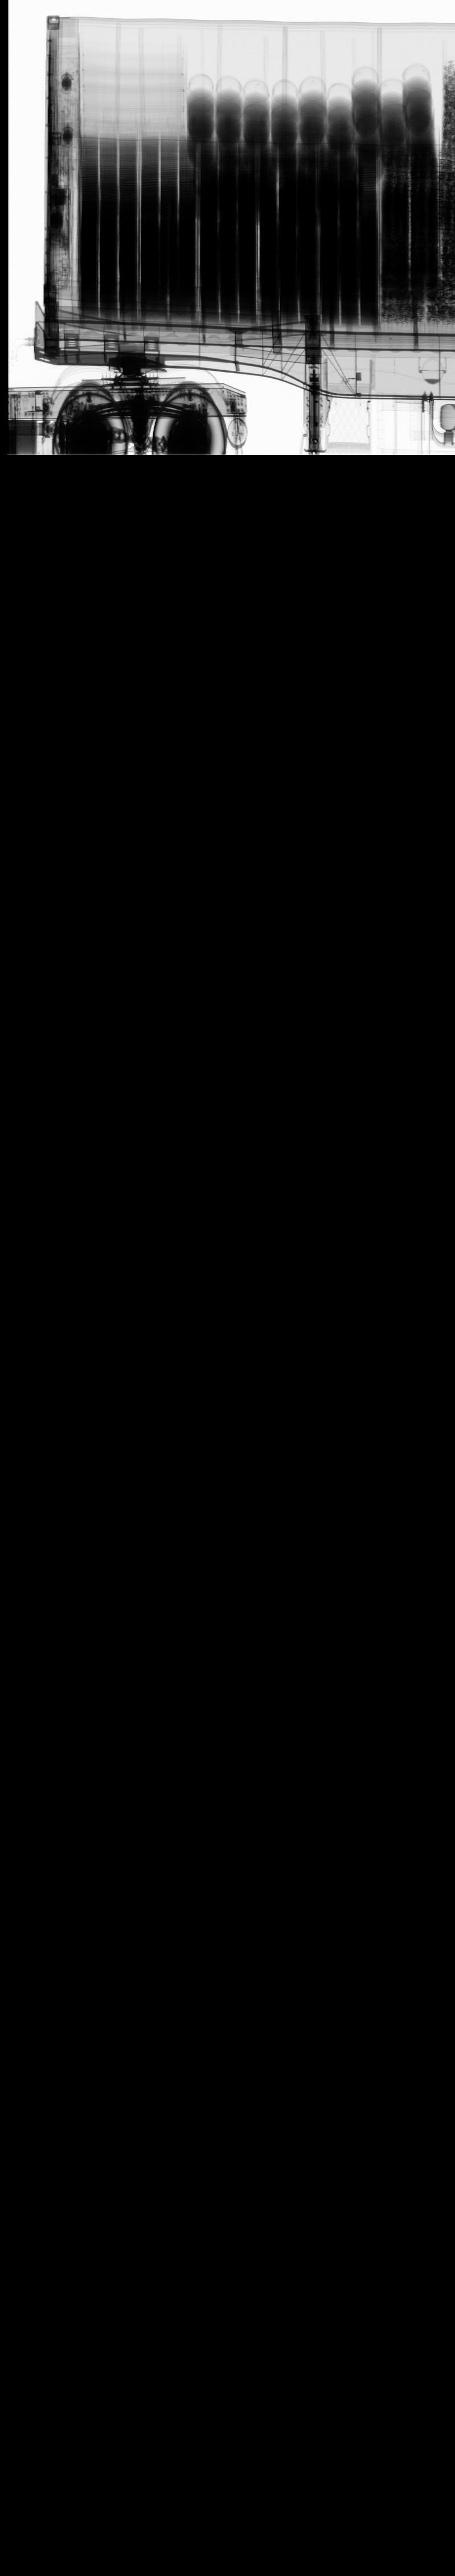

In [63]:
print_one()

603cee61ae377cb75b1aaa6c {'reefer_bbox': [0, 0, 799, 3345], 'reefer_class': 2, 'reefer_score': 0.0}
False


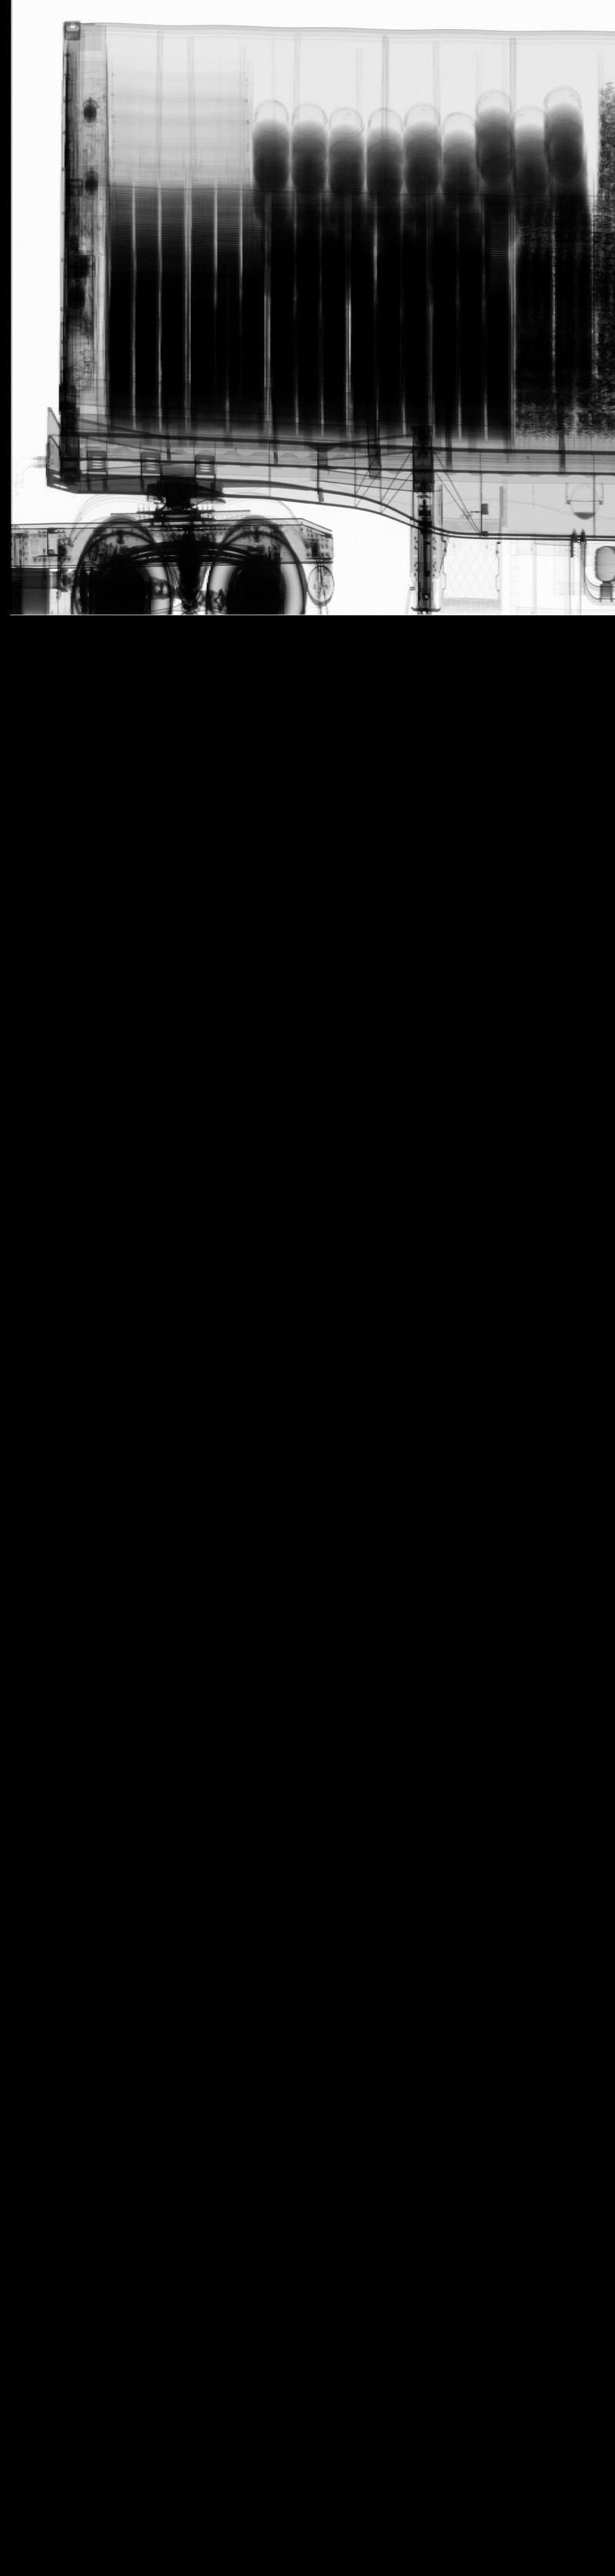

In [64]:
print_one()

603cee9abeb63828c35eb716 {'reefer_bbox': [0, 0, 800, 3206], 'reefer_class': 2, 'reefer_score': 0.0}
False


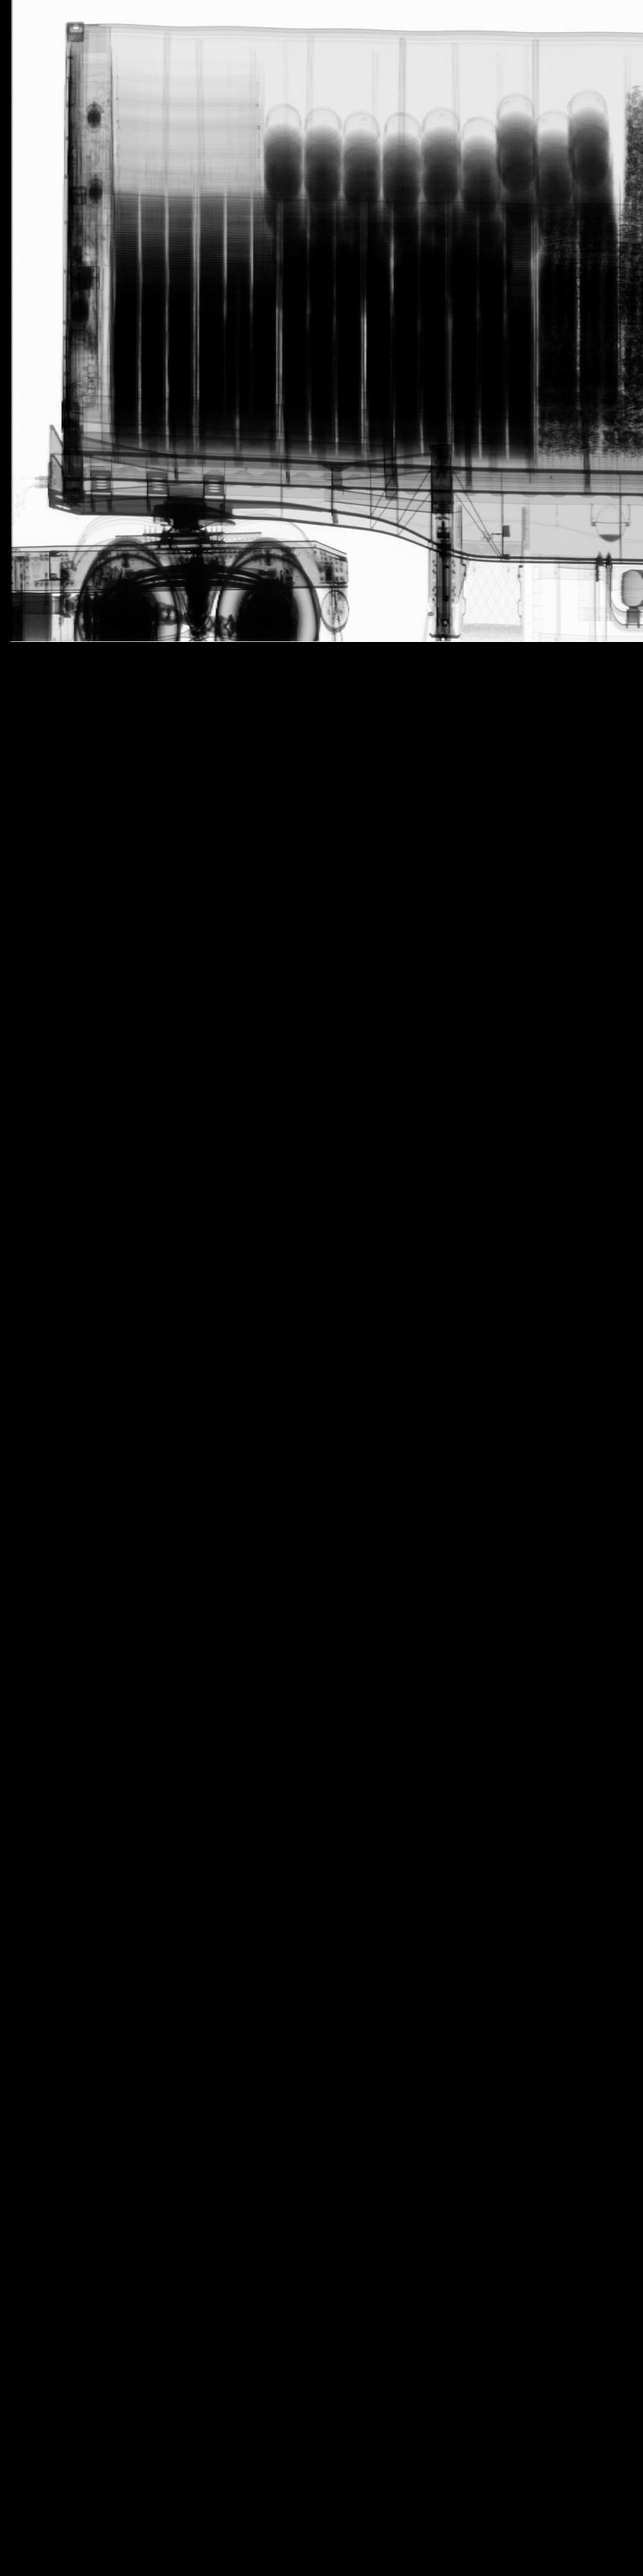

In [65]:
print_one()